# Logistic Regression

---------------------------------------------------------------------------------------------------------------------
### The definiton Logistic Regression
From the statistics standpoint, Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). In the machine learning world, logistic regression is a classification algorithm used to assign observations to a discrete set of classes. 

---------------------------------------------------------------------------------------------------------------------
![Logistic Regression](./img/logistic.png)

### Algorithm
1. Take any real-valued number and map it into a value between the range of 0 and 1. ( Probabilities )
2. This values between 0 and 1 will then be transformed into either 0 or 1 using a threshold classifier

1. Set and collect the data of independent and dependent variables
2. To formulate the model
3. Fit the regression line using maximum likelihood estimation
### Advantages
* It is very efficient and does not require too many computational resources
* Highly interpretable
* The output of logistics regression are well-calibrated predicted probabilities
### Disadvantages
* High reliance on a proper presentation of your data
* Can only predict a categorical outcome
* Being known for its vulnerability to overfitting
### Application

* Image Segmentation and Categorization
* Geographic Image Processing
* Handwriting recognition
* Spam Detection
* Credit Card Fraud or not

---------------------------------------------------------------------------------------------------------------------

### References 
* http://terrence.logdown.com/posts/440690-python-super-simple-implementation-of-logistic-regression-classification-and-examples
* https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148
* https://machinelearningmastery.com/logistic-regression-for-machine-learning/
* https://www.quora.com/What-are-applications-of-linear-and-logistic-regression
* https://machinelearning-blog.com/2018/04/23/logistic-regression-101/

current_cost= 5.0
current_cost= 4.779324992618724
current_cost= 4.592030670476769
current_cost= 4.431243921628778
current_cost= 4.291731755429608
current_cost= 4.16960428974966
current_cost= 4.0619203279190375
current_cost= 3.9663985940774062
current_cost= 3.8812277735971783
current_cost= 3.8049423048126227


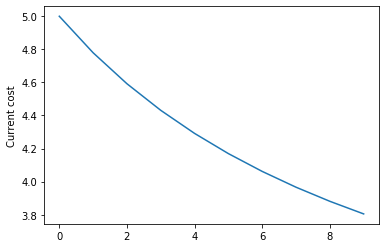

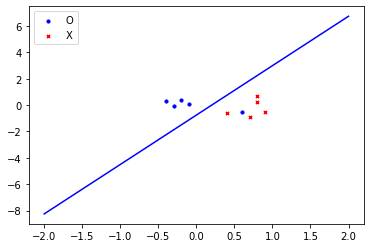

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Dataset Generation

dataset = np.array([
((1, -0.4, 0.3), 0),
((1, -0.3, -0.1), 0),
((1, -0.2, 0.4), 0),
((1, -0.1, 0.1), 0),
((1, 0.6, -0.5), 0), 

((1, 0.8, 0.7), 1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])

#Sigmoid function to calculate the probability

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
#Gradient calculation

def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        g += (error - y) * x
    return g / len(dataset)

#cost function calculation

def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        total_cost += abs(y - error)
    return total_cost

#Logistic Regression 

def logistic(dataset): 

    w = np.zeros(3) # Set default function as 0 + 0*x1 + 0*x2

    limit = 10 

    eta = 1 

    costs = [] 

    for i in range(limit):
        current_cost = cost(dataset, w)
        print("current_cost=",current_cost)
        costs.append(current_cost)
        w = w - eta * gradient(dataset, w)
        eta *= 0.95 

    

    plt.plot(range(limit), costs)
    plt.ylabel('Current cost')
    plt.show()
    return w



w = logistic(dataset)



ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([v[1] for v in ps[:5]], [v[2] for v in ps[:5]], s=10, c='b', marker="o", label='O')
ax1.scatter([v[1] for v in ps[5:]], [v[2] for v in ps[5:]], s=10, c='r', marker="x", label='X')
l = np.linspace(-2,2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.legend(loc='upper left');
plt.show()